In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('results.1d/mergegram_1_1_N=100.csv')

true_distrib = df.true_distrib.unique()
alter_distrib = df.alter_distrib.unique()
values = np.zeros((len(alter_distrib), len(true_distrib)))

In [4]:
for id_td, td in enumerate(true_distrib):
    for id_ad, ad in enumerate(alter_distrib):
        #print(td, ad)
        #print(df.loc[(df.true_distrib == td) & (df.alter_distrib == ad)])
        idx = (df.true_distrib == td) & (df.alter_distrib == ad)
        if np.sum(idx) > 1:
            raise ValueError('Labels are not unique')
        if np.sum(idx) == 1: 
            values[id_ad, id_td] = df.loc[idx].ks

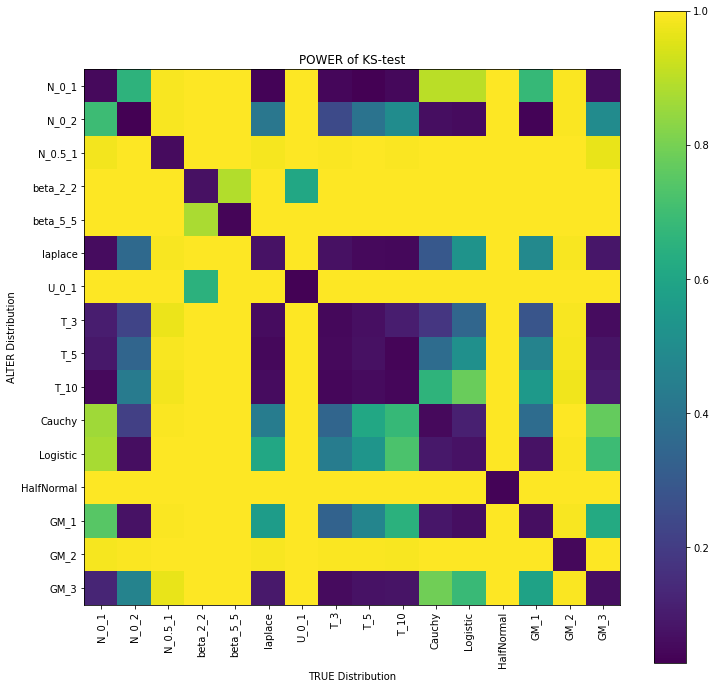

In [5]:
plt.rcParams['figure.figsize'] = [12, 12]
fig, ax = plt.subplots(1,1)
im = ax.imshow(1-values)
ax.set_xticks(range(len(true_distrib)))
ax.set_xticklabels(true_distrib, rotation = 90)
ax.set_yticks(range(len(alter_distrib)))
ax.set_yticklabels(alter_distrib)
ax.set_xlabel('TRUE Distribution')
ax.set_ylabel('ALTER Distribution')
ax.set_title('POWER of KS-test')
fig.colorbar(im)